In [385]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [386]:
df = pandas.read_csv("wandb_100k_inc_curl.csv")
nan = df["n_step"][1980]

In [396]:
controls = df[df["n_step"] == 10]
controls = controls[controls["nce"] == 0]
controls = controls[controls["encoder"] == "nature"]
controls = controls[controls["User"] == "ankeshanand"]
controls = controls[controls["batch_size"] == 32]

our_der = df[df["n_step"] == 20]
our_der = our_der[our_der["nce"] == 0]
our_der = our_der[our_der["encoder"] == "curl"]
our_der = our_der[our_der["User"] == "ankeshanand"]
our_der = our_der[our_der["replay_ratio"] == 32]

In [397]:
our_der = df[df["n_step"] == 20]
len(df[df["n_step"] == nan])

0

In [398]:
atari_der_scores = dict(
    alien=739.9, amidar=188.6, assault=431.2, asterix=470.8,
    bank_heist=51.0, battle_zone=10124.6, boxing=0.2,
    breakout=1.9, chopper_command=861.8, crazy_climber=16185.3,
    demon_attack=508, freeway=27.9, frostbite=866.8,
    gopher=349.5, hero=6857.0, jamesbond=301.6,
    kangaroo=779.3, krull=2851.5, kung_fu_master=14346.1,
    ms_pacman=1204.1, pong=-19.3, private_eye=97.8, qbert=1152.9,
    road_runner=9600.0, seaquest=354.1, up_n_down=2877.4,
)

atari_random_scores = dict(
    alien=227.8, amidar=5.8, assault=222.4, asterix=210.0, bank_heist=14.2, battle_zone=2360.0, boxing=0.1,
    breakout=1.7, chopper_command=811.0, crazy_climber=10780.5, demon_attack=152.1, freeway=0.0, frostbite=65.2,
    gopher=257.6, hero=1027.0, jamesbond=29.0, kangaroo=52.0, krull=1598.0, kung_fu_master=1598.0, ms_pacman=307.3, pong=-20.7,
    private_eye=24.9, qbert=163.9, road_runner=11.5, seaquest=68.4, up_n_down=533.4
)

atari_human_scores = dict(
    alien=7127.7, amidar=1719.5, assault=742.0, asterix=8503.3, bank_heist=753.1, battle_zone=37187.5, boxing=12.1,
    breakout=30.5, chopper_command=7387.8, crazy_climber=35829.4, demon_attack=1971.0, freeway=29.6, frostbite=4334.7,
    gopher=2412.5, hero=30826.4, jamesbond=302.8, kangaroo=3035.0, krull=2665.5, kung_fu_master=22736.3, ms_pacman=6951.6, pong=14.6,
    private_eye=69571.3, qbert=13455.0, road_runner=7845.0, seaquest=42054.7, up_n_down=11693.2
)

In [399]:
atari_der_scores = pandas.DataFrame(np.array(list(atari_der_scores.values())).reshape(-1, 1), 
                                    index=list(atari_der_scores.keys()),
                                    columns=["GameScoreAverage"])

atari_human_scores = pandas.DataFrame(np.array(list(atari_human_scores.values())).reshape(-1, 1), 
                                    index=list(atari_human_scores.keys()),
                                    columns=["GameScoreAverage"])

atari_random_scores = pandas.DataFrame(np.array(list(atari_random_scores.values())).reshape(-1, 1), 
                                    index=list(atari_random_scores.keys()),
                                    columns=["GameScoreAverage"])

In [400]:
atari_der_scores["GameScoreNormalized"] = (atari_der_scores["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/(atari_human_scores["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])

In [401]:
control_games = controls.groupby("game").mean()
our_der_games = our_der.groupby("game").mean()

In [402]:
print(our_der.GameScoreNormalized.median(), our_der.GameScoreNormalized.mean())
print(controls.GameScoreNormalized.median(), controls.GameScoreNormalized.mean())

0.1558878582313089 0.29359438671415644
0.12611582669239213 0.2288213374925621


In [403]:
print(our_der_games["GameScoreNormalized"].median(), our_der_games["GameScoreNormalized"].mean())
print(control_games["GameScoreNormalized"].median(), control_games["GameScoreNormalized"].mean())
print(atari_der_scores["GameScoreNormalized"].median(), atari_der_scores["GameScoreNormalized"].mean())

0.15559953644477223 0.29359438671415644
0.1931436070228043 0.2274536840309572
0.16136157795467734 0.284527025595782


In [357]:
control_games["GameScoreNormalized"] = (control_games["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])/(atari_human_scores["GameScoreAverage"] - atari_random_scores["GameScoreAverage"])

In [404]:
print(np.sum((our_der_games["GameScoreAverage"] > atari_der_scores["GameScoreAverage"])))
print(np.sum((control_games["GameScoreAverage"] > our_der_games["GameScoreAverage"])))
print(np.sum((control_games["GameScoreAverage"] > atari_der_scores["GameScoreAverage"])))

ValueError: Can only compare identically-labeled Series objects

In [304]:
rr_128 = df[df["n_step"] == 5]
rr_128 = rr_128[rr_128["replay_ratio"] == 128]
rr_128_games = rr_128.groupby("game").mean()

In [305]:
atari_der_comp = atari_der_scores[[x in rr_128_games.index for x in atari_der_scores.index]]

In [306]:
control_games = controls.groupby("game").mean()
control_games = control_games[[x in rr_128_games.index for x in control_games.index]]

In [307]:
print(rr_128_games["GameScoreDERNormalized"])

game
alien                NaN
amidar          0.623228
assault         0.549061
asterix         2.059049
boxing         32.880000
freeway         0.234194
frostbite       0.223278
hero            1.072305
jamesbond       0.458180
kangaroo        2.177918
krull                NaN
ms_pacman            NaN
pong           13.107143
private_eye     0.679835
seaquest        0.941687
Name: GameScoreDERNormalized, dtype: float64


In [308]:
print(control_games["GameScoreAverage"])
print(rr_128_games["GameScoreAverage"])

game
alien           723.4600
amidar          152.9240
assault         433.1340
asterix         601.9000
boxing            2.5325
freeway          29.8760
frostbite       337.2000
hero           5510.6300
jamesbond       234.8000
kangaroo       1242.6000
krull          3143.1180
ms_pacman       929.5800
pong             -7.4050
private_eye     -12.0000
seaquest        355.6000
Name: GameScoreAverage, dtype: float64
game
alien           737.860
amidar          119.726
assault         337.044
asterix         747.000
boxing            3.388
freeway           6.534
frostbite       244.180
hero           7278.540
jamesbond       153.900
kangaroo       1636.000
krull          3337.366
ms_pacman      1297.080
pong             -2.350
private_eye      74.460
seaquest        337.440
Name: GameScoreAverage, dtype: float64


In [359]:
print(rr_128_games["GameScoreNormalized"].median(), rr_128_games["GameScoreNormalized"].mean())
print(control_games["GameScoreNormalized"].median(), control_games["GameScoreNormalized"].mean())

0.20978744538480637 0.29764833378817035
0.17658437264396823 0.33195645322770156


In [310]:
print(np.mean((rr_128_games["GameScoreNormalized"] > control_games["GameScoreNormalized"])))
print(np.mean((rr_128_games["GameScoreAverage"] > atari_der_comp["GameScoreAverage"])))
print(np.mean((control_games["GameScoreAverage"] > atari_der_comp["GameScoreAverage"])))

0.6
0.4666666666666667
0.5333333333333333


In [258]:
all_games = df.groupby("game").mean()

In [259]:
nce_1 = df[df["nce"] == 1]
nce_1_games = nce_1.groupby("game").median()

nce_0 = df[df["nce"] == 0]
nce_0_games = nce_0.groupby("game").median()

In [260]:
rel_scores = 100*(nce_1_games["GameScoreNormalized"] - nce_0_games["GameScoreNormalized"])/nce_0_games["GameScoreNormalized"]

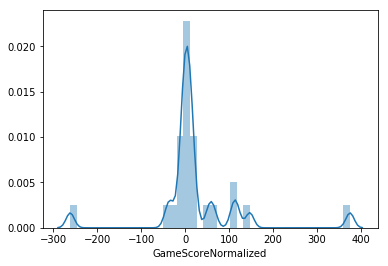

In [261]:
sns.distplot(rel_scores)
plt.show()

In [145]:
print(np.sum((nce_1_games["GameScoreNormalized"] > nce_0_games["GameScoreNormalized"])))

20


In [147]:
print(nce_1_games["GameScoreNormalized"].median(), nce_1_games["GameScoreNormalized"].mean())
print(nce_0_games["GameScoreNormalized"].median(), nce_0_games["GameScoreNormalized"].mean())

0.19057775212476316 0.3091032012296476
0.15778271406399158 0.21446154170387505


In [139]:
for  key in all_games.keys(): print(key, np.mean(all_games[key]))

Runtime 60276.55937700187
Sweep nan
agent.eps_eval 0.0010000000000000005
agent.eps_final 0.0
agent.eps_init 0.0
algo.amortization_decay_constant nan
algo.amortization_loss_weight nan
algo.batch_size 64.0
algo.clip_grad_norm 10.0
algo.discount 0.99
algo.double_dqn 1.0
algo.eps_steps 50000.0
algo.learning_rate 0.00010000000000000002
algo.min_steps_learn 2000.0
algo.model_nce_weight nan
algo.model_rl_weight nan
algo.n_step_return 10.0
algo.nce_loss_weight nan
algo.pri_alpha 0.5
algo.pri_beta_steps 100000.0
algo.prioritized_replay 1.0
algo.replay_ratio 32.0
algo.replay_size 1000000.0
algo.reward_loss_weight nan
algo.target_update_interval 2000.0
algo.target_update_tau 1.0
alternating nan
amortization_decay_constant 0.0
amortization_loss_weight 0.0
async_sample 0.0
aug_prob 1.0
batch_b 1.0
batch_size 64.0
batch_t nan
beluga 0.0
buffered_nce 0.0
c1 1.25
control 0.0
cosine_nce 0.0
debug_cuda_idx 0.0
detach_model 1.0
dirichlet_alpha 0.25
dueling 0.0
dynamics_blocks 4.0
env.episodic_lives 1.0
e

In [121]:
nce_1_games["GameScoreNormalized"]

game
alien              0.121828
amidar             0.131237
assault            0.851270
asterix            0.131522
bank_heist         0.900325
battle_zone        0.618190
boxing             3.568333
breakout           0.297633
chopper_command    0.245331
crazy_climber      2.477694
demon_attack       0.025730
freeway            1.081081
frostbite          0.046610
gopher             0.519467
hero               0.180445
jamesbond          1.752191
kangaroo           0.584311
krull              1.826131
kung_fu_master     0.991518
ms_pacman          0.233019
pong               1.152691
private_eye        0.001015
qbert              0.040589
road_runner        3.304717
seaquest           0.024827
up_n_down          3.512434
Name: GameScoreNormalized, dtype: float64

In [375]:
q_l1 = df[df["n_step"] == 10]
q_l1 = q_l1[q_l1["replay_ratio"] == 64]
q_l1 = q_l1[q_l1["classifier"] == "q_l1"]
q_l1 = q_l1[q_l1["jumps"] == 0]
q_l1 = q_l1[q_l1["time_contrastive"] == 1]
q_l1 = q_l1[q_l1["global_nce"] == 0]
q_l1_games = q_l1.groupby("game").mean()
control_games = controls.groupby("game").mean()
control_games = control_games[[x in q_l1_games.index and x in rr_128_games.index for x in control_games.index]]
atari_der_comp = atari_der_scores[[x in q_l1_games.index and x in rr_128_games.index for x in atari_der_scores.index]]
rr_128_games = rr_128_games[[x in q_l1_games.index and x in rr_128_games.index for x in rr_128_games.index]]
q_l1_games = q_l1_games[[x in q_l1_games.index and x in rr_128_games.index for x in q_l1_games.index]]

In [376]:
print(q_l1_games["GameScoreNormalized"].median(), q_l1_games["GameScoreNormalized"].mean())
print(rr_128_games["GameScoreNormalized"].median(), rr_128_games["GameScoreNormalized"].mean())
print(control_games["GameScoreNormalized"].median(), control_games["GameScoreNormalized"].mean())
print(atari_der_comp["GameScoreNormalized"].median(), atari_der_comp["GameScoreNormalized"].mean())

0.07100392759315352 0.3462679458146717
0.07392281047551415 0.30804495008204175
0.08585166598587848 0.3558352544110107
0.10666977884110403 0.299814397118739


In [377]:
q_l1_games

,Runtime,Sweep,agent.eps_eval,agent.eps_final,agent.eps_init,algo.amortization_decay_constant,algo.amortization_loss_weight,algo.batch_size,algo.clip_grad_norm,algo.discount,...,lossStd,modelGradNorm,modelLoss,modelRLLoss,tdAbsErr,tdAbsErrAverage,tdAbsErrMax,tdAbsErrMedian,tdAbsErrMin,tdAbsErrStd
game,,,,,,,,,,,,,,,,,,,,,
alien,2.2,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
amidar,2.2,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
asterix,2.2,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
freeway,2.4,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
frostbite,2.0,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
krull,2.0,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
ms_pacman,2.2,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
pong,2.0,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
seaquest,2.2,NaN,0.001,0.0,0.0,NaN,NaN,32.0,10.0,0.99,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
print(np.sum((rr_128_games["GameScoreAverage"] > q_l1_games["GameScoreAverage"])))
print(np.sum((q_l1_games["GameScoreAverage"] > control_games["GameScoreAverage"])))
print(np.sum((rr_128_games["GameScoreAverage"] > control_games["GameScoreAverage"])))

5
3
5


In [379]:
rr_128_games["GameScoreNatureNormalized"]

game
alien             NaN
amidar       0.155276
asterix      0.092554
freeway      0.215644
frostbite    0.680274
krull             NaN
ms_pacman         NaN
pong         0.463384
seaquest     0.051564
Name: GameScoreNatureNormalized, dtype: float64